In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os

os.chdir("gdrive/My Drive/Playground")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls

crnn.ipynb   lib	pbcquoc-ocr-64e6eb1d0e63  VNese_ocr.ipynb
crnn.py      loader.py	predict.py
data	     model	predict.sh
labels.json  notebook	preprocess.sh


In [3]:


import sys
#sys.path.append('../lib')
sys.path.append('lib')
import json
import pandas as pd
import matplotlib.pyplot as plt
from random_eraser import get_random_eraser
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import cv2
import json
import editdistance
from PIL import Image

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

Using TensorFlow backend.


In [0]:
labels = json.load(open('data/Data/Name/labels.json'))

In [0]:
y = pd.DataFrame(list(labels.values()), columns=['y'])

In [0]:
y['length'] = y['y'].str.len()
y['comma'] = y['y'].str.split(',').str.len()

In [9]:
y.head()

,y,length,comma
0,Hoàng Việt,10,1
1,Nguyễn Hữu Vĩnh San,19,1
2,Nguyễn Thế Hòa,14,1
3,Nguyễn Gia Thịnh,16,1
4,Nguyễn Văn Trí,14,1


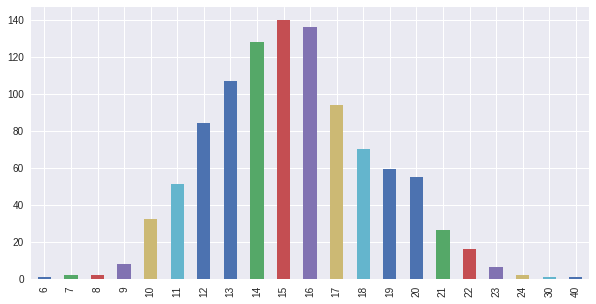

In [10]:
y['length'].value_counts().sort_index().plot.bar()

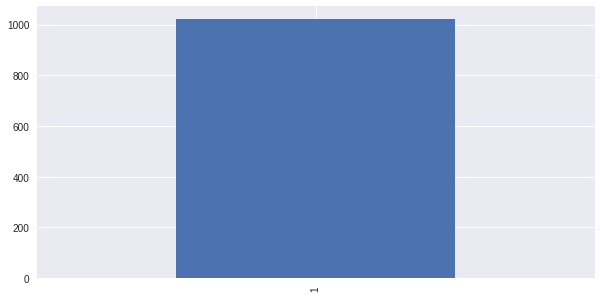

In [11]:
y['comma'].value_counts().sort_index().plot.bar()

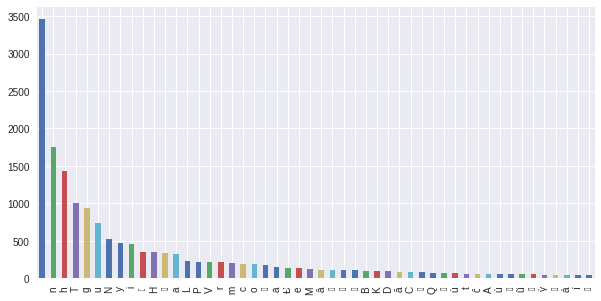

In [12]:
pd.value_counts(list(' '.join(y['y'].values))).head(50).plot.bar()

In [13]:
''.join(sorted(list(set(list(' '.join(y['y'].values))))))

' ABCDEGHKLMNOPQRSTUVXYacdeghilmnoprstuyÁÂÍÔàáâãéêìíòóôõùúýăĐĩũơưạẢảấầẩẫậắằặếềểễệỉịọốồỗộớờởợụủứừửữựỳỷỹ'

In [0]:
# Function to distort image
def elastic_transform(image, alpha, sigma, alpha_affine, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.

     Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    shape_size = shape[:2]
    
    # Random affine
    center_square = np.float32(shape_size) // 2
    square_size = min(shape_size) // 3
    pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

In [0]:
random_eraser = get_random_eraser(p=1, s_l=0.004, s_h=0.005, r_1=0.01, r_2=1/0.01, v_l=0, v_h=1)

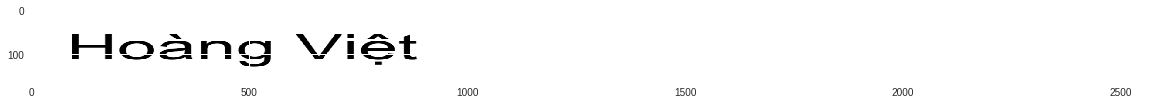

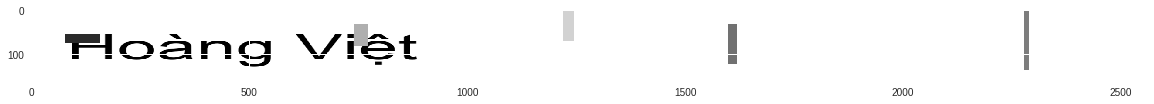

In [17]:
plt.figure(figsize=(20, 10))
img = image.load_img('./data/Data/Name/Sample_0.png', target_size=(160, 2560), interpolation='bicubic')
img = image.img_to_array(img)/255
plt.imshow(img)

img_eraser = random_eraser(img)
for _ in range(4):
    img_eraser = random_eraser(img_eraser)


plt.figure(figsize=(20, 10))
plt.imshow(img_eraser)